In [15]:
%pip install ultralytics opencv-python 


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Visualisation YOLO -- Detection d'abeilles
Image : 20220708_084600_mp4-23_jpg.rf.bf5725643d465417a59b113199e415ba.jpg
Nombre de détections : 1


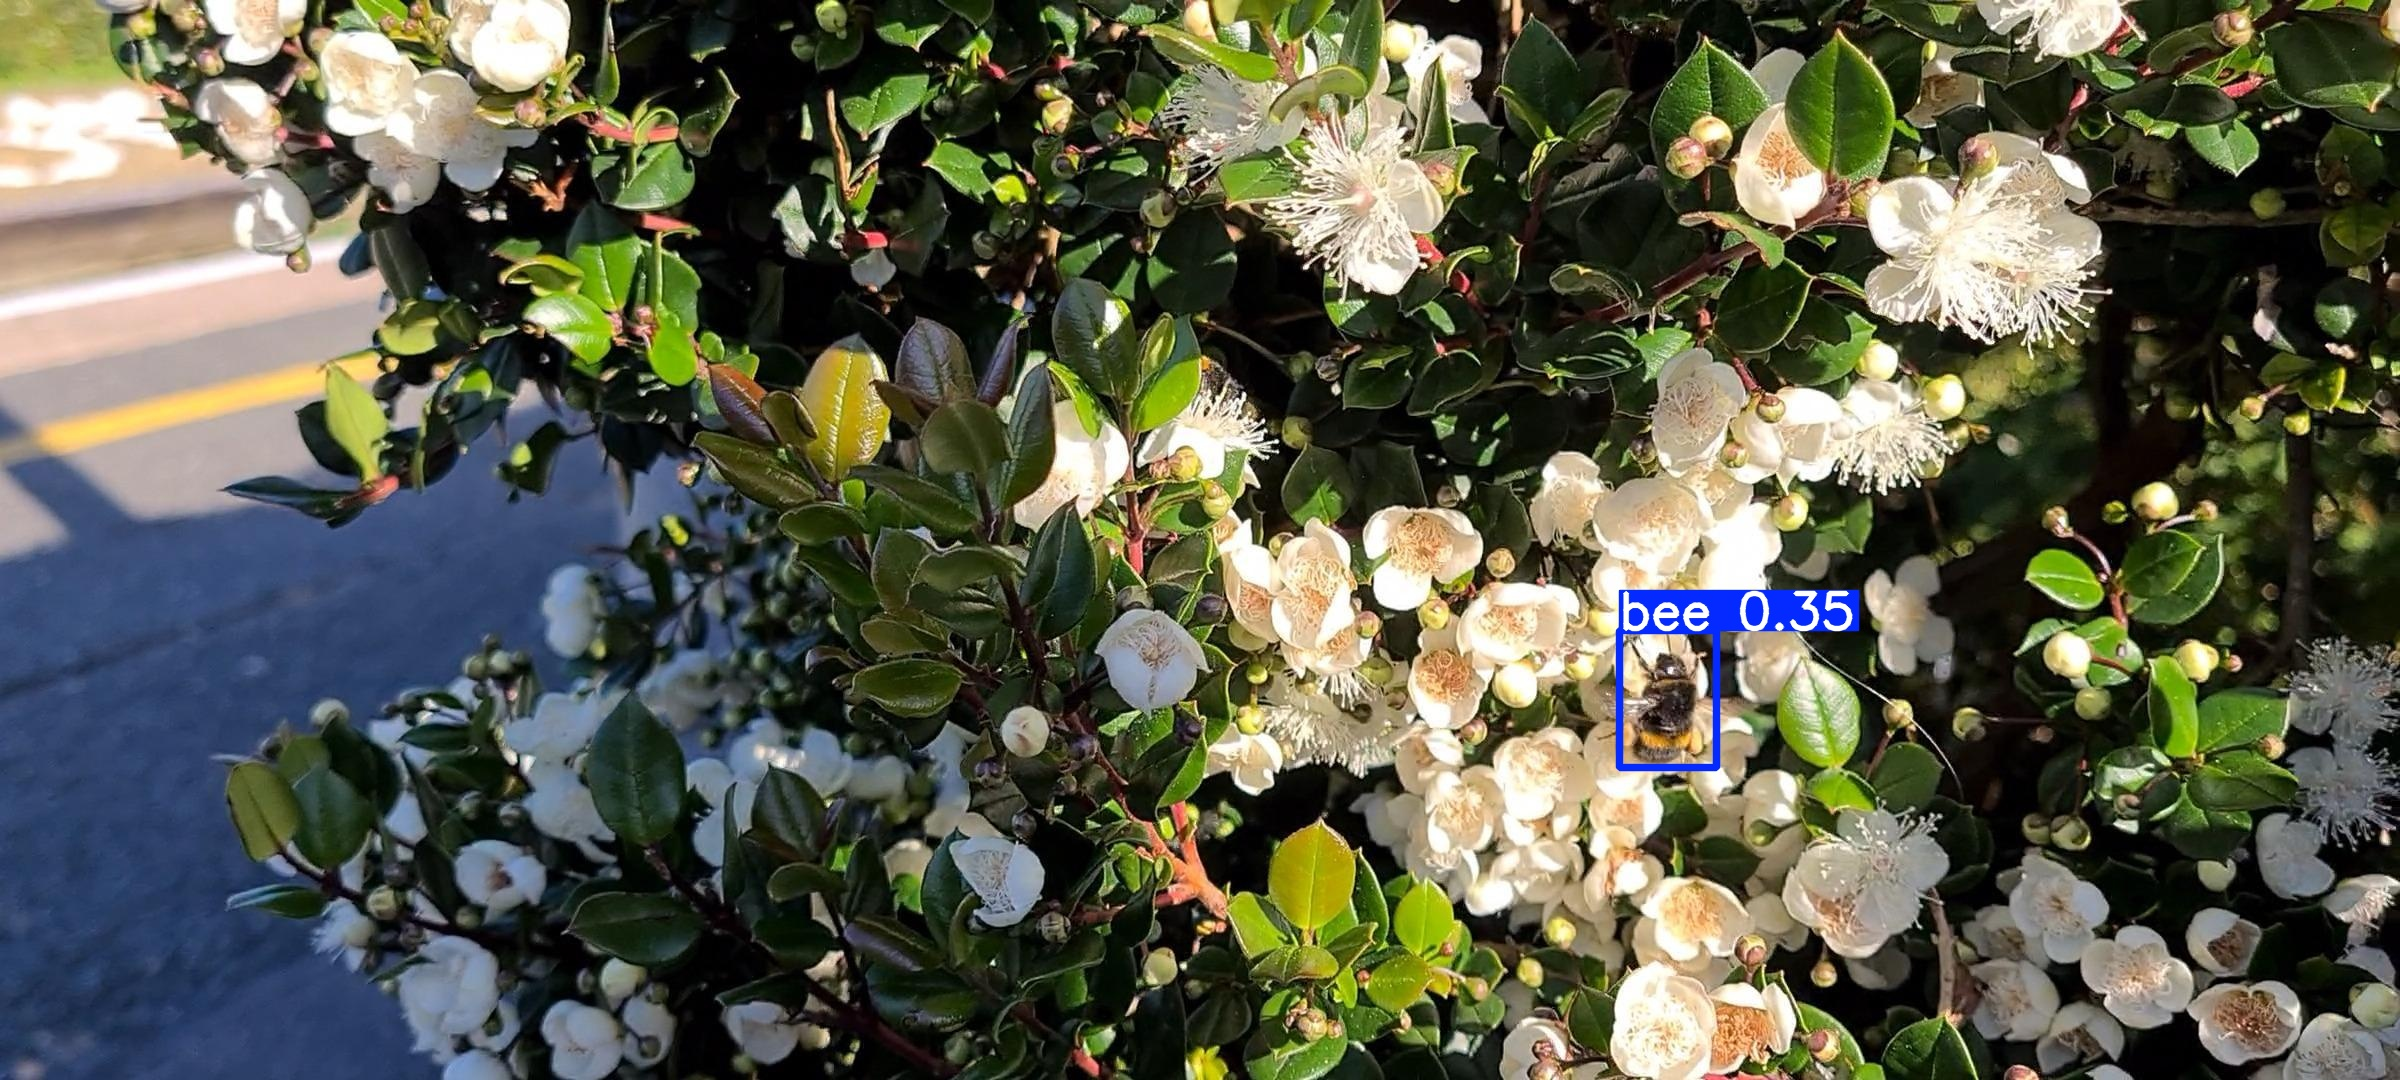


Arrêt de la démo par l'utilisateur.


In [17]:
import glob
import os
import cv2
import time
from ultralytics import YOLO
from IPython.display import Image, display, clear_output


model = YOLO("runs/train/bee_experiment_win/weights/best.pt")
image_extensions = ("*.jpg", "*.jpeg", "*.png")
images_list = []
for ext in image_extensions:
    images_list.extend(glob.glob(f"datasets/bees/test/images/{ext}"))

images_list = sorted(images_list) 
delay = 5  


try:
    for img_path in images_list:
        # Inférence
        results = model(img_path, conf=0.25, verbose=False)
        res = results[0]
        annotated = res.plot()
        clear_output(wait=True)
        temp_path = "result.jpg"
        cv2.imwrite(temp_path, annotated)
        
        print(f"Visualisation YOLO -- Detection d'abeilles")
        print(f"Image : {os.path.basename(img_path)}")
        print(f"Nombre de détections : {len(res.boxes)}")
        
        display(Image(filename=temp_path))
        
        # Pause de 5 secondes
        time.sleep(delay)

except KeyboardInterrupt:
    print("\nArrêt de la démo par l'utilisateur.")